In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTENC,SMOTE
from imblearn.combine import SMOTETomek,SMOTEENN

In [2]:
%matplotlib widget

# Data Inspection and Visualization

In [3]:
url = './cirrhosis.csv'
df = pd.read_csv(url)
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [4]:
df.describe()

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
ID               418 non-null int64
N_Days           418 non-null int64
Status           418 non-null object
Drug             312 non-null object
Age              418 non-null int64
Sex              418 non-null object
Ascites          312 non-null object
Hepatomegaly     312 non-null object
Spiders          312 non-null object
Edema            418 non-null object
Bilirubin        418 non-null float64
Cholesterol      284 non-null float64
Albumin          418 non-null float64
Copper           310 non-null float64
Alk_Phos         312 non-null float64
SGOT             312 non-null float64
Tryglicerides    282 non-null float64
Platelets        407 non-null float64
Prothrombin      416 non-null float64
Stage            412 non-null float64
dtypes: float64(10), int64(3), object(7)
memory usage: 65.4+ KB


In [6]:
#removing IDs
df=df.drop(columns=['ID'])

#visualize NANs
print ("{:<13} {:<15}".format('Features','#Nans'))
print ("------------------------")
for c in df.columns:
    print ("{:<13} {:<15}".format(c,df[c].isna().sum()))

Features      #Nans          
------------------------
N_Days        0              
Status        0              
Drug          106            
Age           0              
Sex           0              
Ascites       106            
Hepatomegaly  106            
Spiders       106            
Edema         0              
Bilirubin     0              
Cholesterol   134            
Albumin       0              
Copper        108            
Alk_Phos      106            
SGOT          106            
Tryglicerides 136            
Platelets     11             
Prothrombin   2              
Stage         6              


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F386AF4C8>]],
      dtype=object)

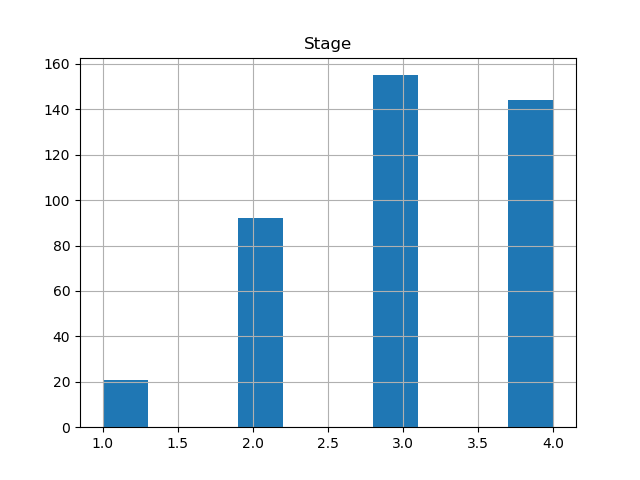

In [7]:
## Target class distribution
df.hist(column="Stage")

c:\Users\39345\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\Users\39345\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\Users\39345\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
c:\Users\39345\Anaconda3\lib\site-packages\pandas\plotting\_matpl

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028F389E4588>,
      dtype=object)

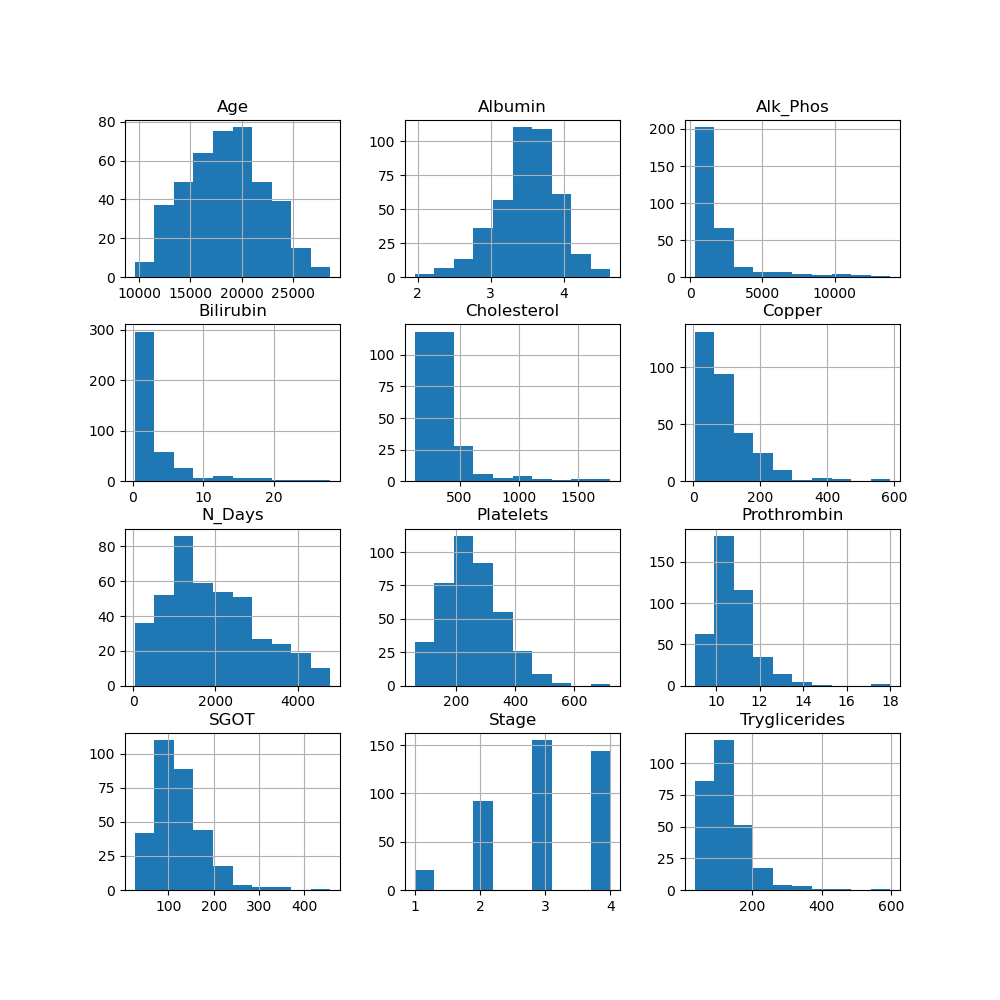

Unhandled message type set_device_pixel_ratio. {'device_pixel_ratio': 1.25, 'type': 'set_device_pixel_ratio'}


In [8]:
df.hist(figsize=(10,10), bins=10)

In [9]:
df = df.dropna(subset=['Stage']) #throw away data with no target class
df['Drug'] = df['Drug'].fillna('NoDrug') #no drugs used not NaNs

#fill non categoricals with mean
for c in df.columns:
    if df[c].isna().sum()!=0:
        if df[c].dtypes == float:
            print('Non cat',c)
            meanval = df[c].mean()
            print(meanval)
            df[c]=df[c].fillna(value=meanval)

#fill categoricals 
# fill cat with most occurrent or remove:
rem=False

if rem:
    for c in df.columns:
        if df[c].isna().sum()!=0:
            df = df.dropna(subset=[c])
else:
    for c in df.columns:
        if df[c].isna().sum()!=0:
            print('Cat',c)
            occ = df[c].value_counts()
            print(occ.index[0])
            df[c]= df[c].fillna(occ.index[0])

Non cat Cholesterol
369.51056338028167
Non cat Copper
97.64838709677419
Non cat Alk_Phos
1982.6557692307692
Non cat SGOT
122.55634615384616
Non cat Tryglicerides
124.70212765957447
Non cat Platelets
256.1022443890274
Non cat Prothrombin
10.733414634146339
Cat Ascites
N
Cat Hepatomegaly
Y
Cat Spiders
N


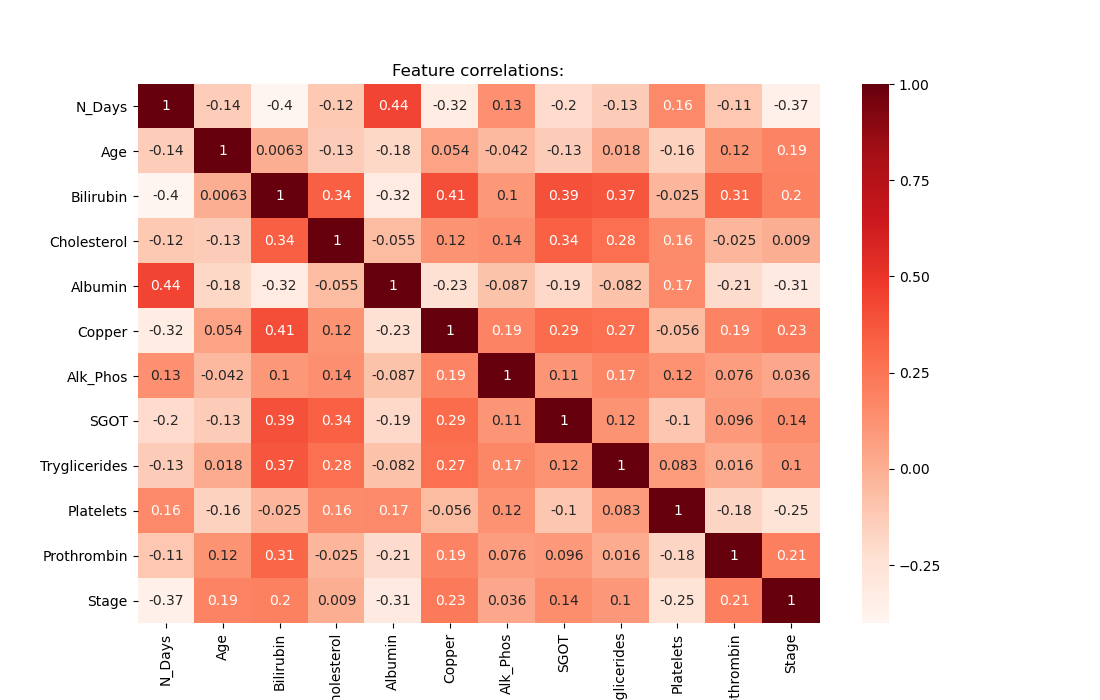

In [10]:
plt.figure(figsize=(11,7))
plt.title('Feature correlations:')
sns.heatmap(df.corr(),annot=True,cmap='Reds')

# Classification

In [11]:
def up_resample(X_train,y_train,k=3):
    smNC = SMOTE(random_state=42,k_neighbors=k)
    return smNC.fit_resample(X_train, y_train)

def up_down_resample(X_train,y_train):
    smT = SMOTETomek(random_state=42)
    return smT.fit_resample(X_train, y_train)

In [12]:
for c in df.columns:
    if df[c].dtypes != float:
        df[c] = df[c].astype('category').cat.codes


In [13]:
#target_names=['1','2','3','4']
df['Stage'] = np.where(df['Stage'] == 4,1,0)


StandardScaling - PCA - Up/Down Sampling - CrossVal - Test

In [80]:
X = df.drop(columns=['Stage'])
y = df['Stage']

scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

X.shape

(412, 18)

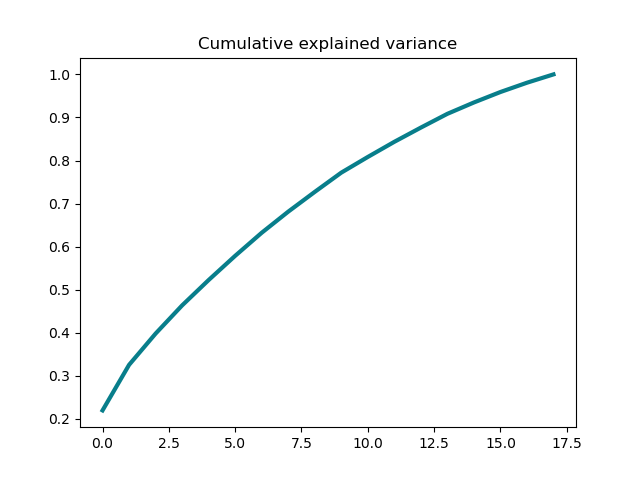

In [81]:
from sklearn.decomposition import PCA
pca = PCA().fit(X)

plt.close('all')
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance', size=12)
plt.show()


In [16]:
apply_PCA=False
pca = PCA(n_components=13)
X_pca = pca.fit_transform(X)
X_pca = pd.DataFrame(data = X_pca) 
print(X_pca.shape)
if apply_PCA:
    X=X_pca

(412, 13)

In [82]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=.15,random_state=42)

In [83]:
print('Training set dim:',X_train.shape)
print('Test set dim:    ',X_test.shape)
print('distr y train\n',y_train.value_counts())
print('distr y test\n',y_test.value_counts())

Training set dim: (350, 18)
Test set dim:     (62, 18)
distr y train
 0    227
1    123
Name: Stage, dtype: int64
distr y test
 0    41
1    21
Name: Stage, dtype: int64


In [84]:
#updown or up
X_train,y_train = up_resample(X_train,y_train,k=5)

In [85]:
print('Training set dim:',X_train.shape)

Training set dim: (454, 18)


In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import RocCurveDisplay,ConfusionMatrixDisplay,roc_curve,auc
from sklearn import svm

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42) #non cambia molto
model = RandomForestClassifier(random_state=42)
scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.89 accuracy with a standard deviation of 0.04


In [34]:
## GridSearchCV - RF
grid=False
if grid:
    metric ='roc_auc'
    parameters = {'n_estimators':[10,50,100],
                'max_features':['auto','sqrt','log2'],
                'max_depth':list(range(1,19)),
                'criterion':['gini','entropy']
                }
    rfc = RandomForestClassifier(random_state=42)
    clf = GridSearchCV(rfc, parameters,scoring = metric)
    clf.fit(X_train,y_train)

    print('Best parameters',clf.best_params_)
    print('Best score',clf.best_score_)

Best parameters {'criterion': 'gini', 'max_depth': 14, 'max_features': 'auto', 'n_estimators': 100}
Best score 0.9031465378421901


In [88]:
rf = RandomForestClassifier(random_state=42, 
                            criterion= 'gini',max_features='auto',
                            max_depth=14, n_estimators= 100)

xgb=XGBClassifier()

rf.fit(X_train,y_train)
xgb.fit(X_train, y_train)
y_predxg = xgb.predict(X_test)
y_predrf = rf.predict(X_test)

print('RF')
print(classification_report(y_test, y_predrf, target_names=['0','1'], zero_division="warn"))


print('XGB')
print(classification_report(y_test, y_predxg, target_names=['0','1'], zero_division="warn"))

RF
              precision    recall  f1-score   support

           0       0.77      0.80      0.79        41
           1       0.58      0.52      0.55        21

    accuracy                           0.71        62
   macro avg       0.67      0.66      0.67        62
weighted avg       0.70      0.71      0.71        62

XGB
              precision    recall  f1-score   support

           0       0.82      0.76      0.78        41
           1       0.58      0.67      0.62        21

    accuracy                           0.73        62
   macro avg       0.70      0.71      0.70        62
weighted avg       0.74      0.73      0.73        62



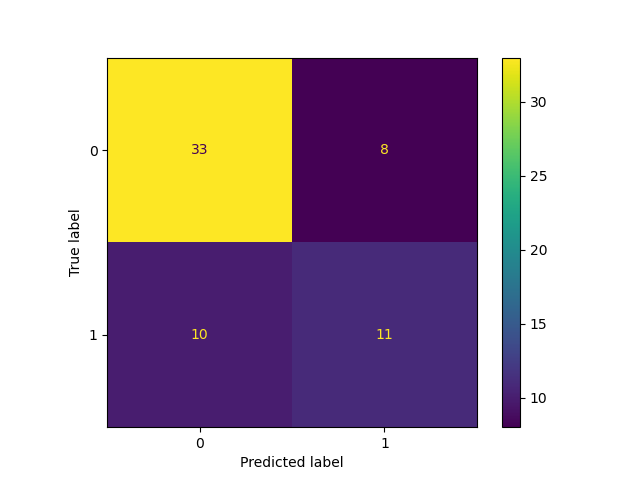

In [89]:

ConfusionMatrixDisplay.from_predictions(y_test,y_predrf)

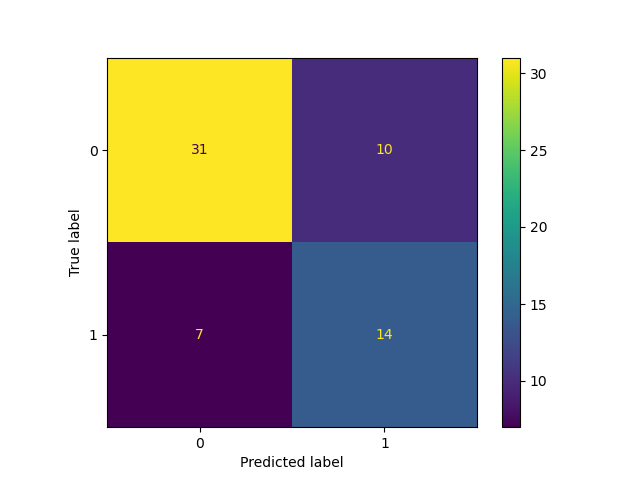

In [90]:
ConfusionMatrixDisplay.from_predictions(y_test,y_predxg)

In [110]:
fpr, tpr, thresholds = roc_curve(y_test, y_predxg)
roc_auc = auc(fpr, tpr)
displayxg=RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='XGB')

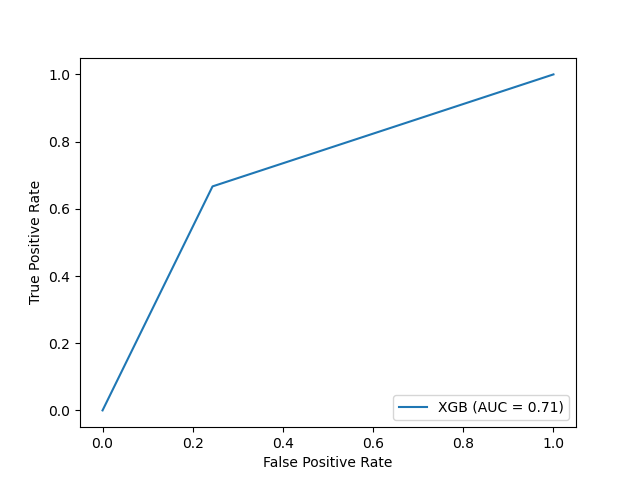

In [111]:
displayxg.plot()